In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
n = 9999

In [11]:
x_train[n]

array([[  0,   0,   0,   0,   1,   0,   0,  15,  77,  50,  12,   5,   0,
          1,   2,   0,   0,  10,  84,  66,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   3,   0,  18, 129, 181, 187, 210, 188, 165, 173,
        175, 187, 176, 198, 221, 179, 183, 165,  73,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 162, 153, 141, 143, 142, 173, 182, 177,
        171, 181, 175, 170, 159, 137, 132, 136, 191,  68,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 157, 140, 140, 142, 163, 152, 140, 175,
        194, 175, 134, 147, 150, 158, 138, 128, 149, 128,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,  94, 158, 145, 145, 136, 140, 159, 151, 170,
        196, 176, 149, 143, 142, 138, 132, 141, 145, 146,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 124, 159, 143, 153, 146, 135, 127, 132, 166,
        208, 161, 125, 134, 135, 128, 142, 146, 149, 170,   2,   0,   0,
          0,   0],
       [  

In [12]:
y_train[n]

6

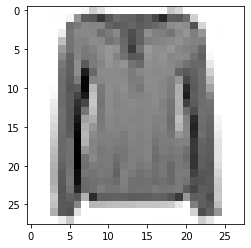

In [13]:
plt.imshow(x_train[n], cmap='Greys')

這是: Sandal


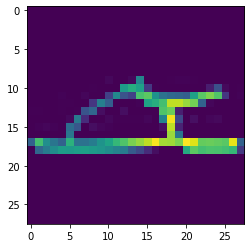

In [14]:
n = 2345
print('這是:', class_names[y_train[n]])
plt.imshow(x_train[n]);

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train.reshape(60000 ,784)/255

In [17]:
x_test = x_test.reshape(10000, 784)/255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_test = to_categorical(y_test, 10)

In [21]:
y_train[2345]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
model = Sequential()

In [24]:
model.add(Dense(15,input_dim=784, activation='relu'))

In [25]:
model.add(Dense(15, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 12,175
Trainable params: 12,175
Non-trainable params: 0
_________________________________________________________________


In [29]:
784*80 + 80

62800

In [30]:
model.fit(x_train, y_train, batch_size=40, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0816 - accuracy: 0.2675
Epoch 2/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0676 - accuracy: 0.4037
Epoch 3/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0607 - accuracy: 0.5151
Epoch 4/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0504 - accuracy: 0.6274
Epoch 5/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0415 - accuracy: 0.7146
Epoch 6/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0363 - accuracy: 0.7591
Epoch 7/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0329 - accuracy: 0.7836
Epoch 8/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0304 - accuracy: 0.7998
Epoch 9/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0287 - accuracy: 0.8108
Epoch 10/30
60

In [31]:
result = model.predict_classes(x_test)

神經網路預測結果: 7


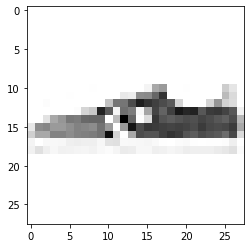

In [32]:
n = 8520

print('神經網路預測結果:', result[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [37]:
def show_predict(n):
    print('神經網路說是:',result[n])
    plt.imshow(x_test[n].reshape(28,28))

神經網路說是: 9


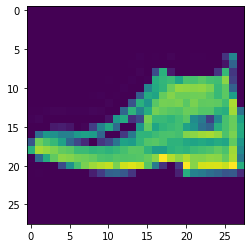

In [39]:
show_predict(4567)

# 改成兩層個15個神經元，batch_size=40